In [1]:
# Required Packages
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import pandas_datareader.data as pdr
import math

from datetime import datetime
from datetime import timedelta
import matplotlib.dates as mdates

# Progress Bar
from IPython.core.display import Image, display
import progressbar

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# sns setting
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":14,"axes.labelsize":12})

# plt setting
sns.set_style('whitegrid')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# The Market Analysis for Communication Services Sector


In this article, the **Communication Services Sector** from [Yahoo! Finance](https://finance.yahoo.com/) is used, and we analyze the current top tech companies' stock prices.

#### Table of contentens

* [Stock Prices Fluctuations](#Stock-Prices-Fluctuations)
* [The Moving Average of the Stocks](#The-Moving-Average-of-the-Stocks)
* [The Daily Return Average of a Stock](#The-Daily-Return-Average-of-a-Stock)
* [The Correlation Between Daily Returns of Different Stocks](#The-Correlation-Between-Daily-Returns-of-Different-Stocks)
* [Predicting Future Behaviors](#Predicting-Future-Behaviors)
    * [Facebook, Inc.](#Facebook,-Inc.)
    

| Symbol | Name | Symbol | Name | Symbol | Name |
|--------|-----------------------------|--------|-------------------------------|--------|-----------------------------------|
| GOOG | Alphabet Inc. | CHTR | Charter Communications, Inc. | BIDU | Baidu, Inc. |
| GOOGL | Alphabet Inc. | TMUS | T-Mobile US, Inc. | NTES | NetEase, Inc. |
| FB | Facebook, Inc. | VOD | Vodafone Group Plc | TEF | Telefonica, S.A. |
| T | AT&T Inc. | AMX | America Movil, S.A.B. de C.V. | CHA | China Telecom Corporation Limited |
| DIS | The Walt Disney Company | AMOV | America Movil, S.A.B. de C.V. | SIRI | Sirius XM Holdings Inc. |
| VZ | Verizon Communications Inc. | RELX | RELX PLC | EA | Electronic Arts Inc. |
| CMCSA | Comcast Corporation | BCE | BCE Inc. | CHT | Chunghwa Telecom Co., Ltd. |
| CHL | China Mobile Limited | ORAN | Orange S.A. |  |  |
| NFLX | Netflix, Inc. | ATVI | Activision Blizzard, Inc. |  |  |

In [2]:
Stock_list = ['GOOG','GOOGL','FB','T','DIS','VZ','CMCSA','CHL','NFLX','CHTR','TMUS','VOD','AMX','AMOV','RELX','BCE',
              'ORAN','ATVI','BIDU','NTES','TEF','CHA','SIRI','EA','CHT']

Stock_Dic = {'GOOG':'Alphabet Inc.', 'GOOGL':'Alphabet Inc.', 'FB':'Facebook, Inc.','T':'AT&T Inc.',
            'DIS':'The Walt Disney Company','VZ':'Verizon Communications Inc.','CMCSA':'Comcast Corporation',
            'CHL':'China Mobile Limited','NFLX':'Netflix, Inc.','CHTR':'Charter Communications, Inc.',
            'TMUS':'T-Mobile US, Inc.','VOD':'Vodafone Group Plc','AMX':'America Movil, S.A.B. de C.V.',
            'AMOV':'America Movil, S.A.B. de C.V.','RELX':'RELX PLC','BCE':'BCE Inc.',
            'ORAN':'Orange S.A.','ATVI':'Activision Blizzard, Inc.','BIDU':'Baidu, Inc.',
            'NTES':'NetEase, Inc.','TEF':'Telefonica, S.A.','CHA':'China Telecom Corporation Limited',
            'SIRI':'Sirius XM Holdings Inc.','EA':'Electronic Arts Inc.','CHT':'Chunghwa Telecom Co., Ltd.'}

The data is collected from **The beginning of the five years ago until now**.

In [3]:
start, end = [datetime(datetime.today().year-5, 1, 1), datetime.today()]
# start, end = [datetime(datetime.today().year-5,datetime.today().month,datetime.today().day), datetime.today()]

In [4]:
def Timeline_plot(start, end, width = 16):
    fig, ax = plt.subplots(figsize=(width, 1))
    Temp = pd.date_range(start, datetime(end.year, end.month, 1), freq='MS')
    ax.plot((start, end), (0, 0), 'k', alpha=.5)
    ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=2))
    ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
    #fig.autofmt_xdate()
    _ = plt.setp((ax.get_yticklabels() + ax.get_yticklines() + list(ax.spines.values())), visible=False)
    for i in Temp:
        ax.scatter(i, 0, s=30, facecolor='#e74c3c', edgecolor='k')
    ax.grid(False)
    _  = plt.xticks(rotation=90)
    Temp1 = Temp.min().replace(day=1) - timedelta(days=1)
    Temp2 = Temp.max().replace(day=1) + timedelta(days=31)
    _ = ax.set_xlim ([datetime(Temp1.year,Temp1.month, 1), datetime(Temp2.year,Temp2.month, 1)]) 

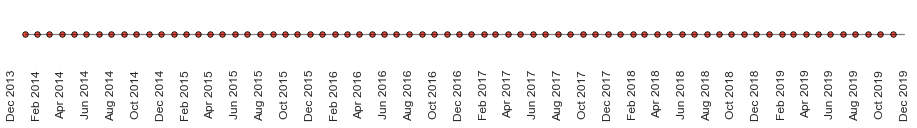

In [5]:
Timeline_plot(start, end)

Collecting data from **Yahoo Finance!**, and creating moving averages for **10**, **20** and **60** day periods of time.

In [6]:
def Get_Data(Inp):
    Days = [10, 20, 60]
    Out = pdr.DataReader(Inp, 'yahoo', start, end)
    Out.insert(0, 'Symbol', Inp) 
    for j in Days:
        column_name = "Moving Ave. %s days" % (str(j))
        Out[column_name] = Out['Adj Close'].rolling(window=j, center=False).mean()
    return Out

In [7]:
Data = Get_Data(Stock_list[0])

Counter = 0
Progress_Bar = progressbar.ProgressBar(maxval=len(Stock_list),
                                       widgets=[progressbar.Bar('#', '|', '|'), progressbar.Percentage()])
Progress_Bar.start()
for i in Stock_list[1:]:
    Counter+=1
    Progress_Bar.update(Counter)
    Temp = Get_Data(i)
    Data = pd.concat([Data, Temp])
    del Temp
Progress_Bar.finish()

|#########################################################################|100%


Displaying today's data only:

In [8]:
Today = Data[Data.index == Data.index[-1]].reset_index(drop = True)
Today.style.hide_index()

In [9]:
print('Currently, the stock with the highest volume is %s' %
      Stock_Dic[Today[Today.Volume == Today.Volume.max()].Symbol.values[0]])

Currently, the stock with the highest volume is AT&T Inc.


Consider **AT&T Inc** for example. We have,

In [10]:
def Disp_Data(Inp, df = Data):
    Out = df[df.Symbol == Inp].drop(columns=['Symbol'])
    return Out

In [11]:
Temp = Disp_Data('T')
Temp.describe()

High          Low         Open        Close        Volume  \
count  1489.000000  1489.000000  1489.000000  1489.000000  1.489000e+03   
mean     35.779288    35.285923    35.547132    35.540964  2.808405e+07   
std       3.284943     3.290724     3.283753     3.295216  1.440596e+07   
min      28.100000    26.799999    27.500000    27.360001  0.000000e+00   
25%      33.389999    32.820000    33.090000    33.139999  1.985600e+07   
50%      35.150002    34.740002    35.000000    34.959999  2.485250e+07   
75%      38.279999    37.759998    38.009998    38.049999  3.200100e+07   
max      43.889999    43.330002    43.500000    43.470001  1.950827e+08   

         Adj Close  Moving Ave. 10 days  Moving Ave. 20 days  \
count  1489.000000          1480.000000          1470.000000   
mean     30.300925            30.294890            30.285437   
std       3.662823             3.614829             3.554785   
min      23.328541            23.564311            23.735650   
25%      26.904530            26.882923            26.789022   
50%      30.083981            30.164595            30.169184   
75%      33.287872            33.198202            33.205466   
max      39.630001            39.300000            38.730500   

       Moving Ave. 60 days  
count          1430.000000  
mean             30.263337  
std               3.316295  
min              24.297408  
25%              26.631190  
50%              30.223726  
75%              33.049340  
max              37.719089

In [12]:
Temp.head().dropna(axis = 1)

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2014-01-02  35.290001  34.950001  35.240002  34.950001  20229900.0  25.254278
2014-01-03  35.160000  34.610001  35.150002  34.799999  24618300.0  25.145884
2014-01-06  35.049999  34.799999  35.009998  34.959999  20791500.0  25.261499
2014-01-07  35.150002  34.910000  35.130001  34.950001  25725100.0  25.254278
2014-01-08  34.599998  34.099998  34.450001  34.240002  37745500.0  25.071218

In [13]:
Temp.tail()

High        Low       Open      Close      Volume  Adj Close  \
Date                                                                            
2019-11-22  37.930000  37.689999  37.750000  37.750000  19877100.0  37.750000   
2019-11-25  37.900002  37.180000  37.900002  37.259998  32455200.0  37.259998   
2019-11-26  37.439999  36.770000  37.279999  37.400002  54016200.0  37.400002   
2019-11-27  37.400002  37.400002  37.400002  37.400002         0.0  37.400002   
2019-11-29  37.959999  37.549999  37.740002  37.555000   6151719.0  37.555000   

            Moving Ave. 10 days  Moving Ave. 20 days  Moving Ave. 60 days  
Date                                                                       
2019-11-22              38.6310             38.73050            37.564078  
2019-11-25              38.4200             38.66900            37.605408  
2019-11-26              38.2430             38.63600            37.647099  
2019-11-27              38.0670             38.59600            37.683200  
2019-11-29              37.9275             38.54925            37.719089

# Stock Prices Fluctuations

Let's plot the stocks adjusted the closing price for all stock data under study.

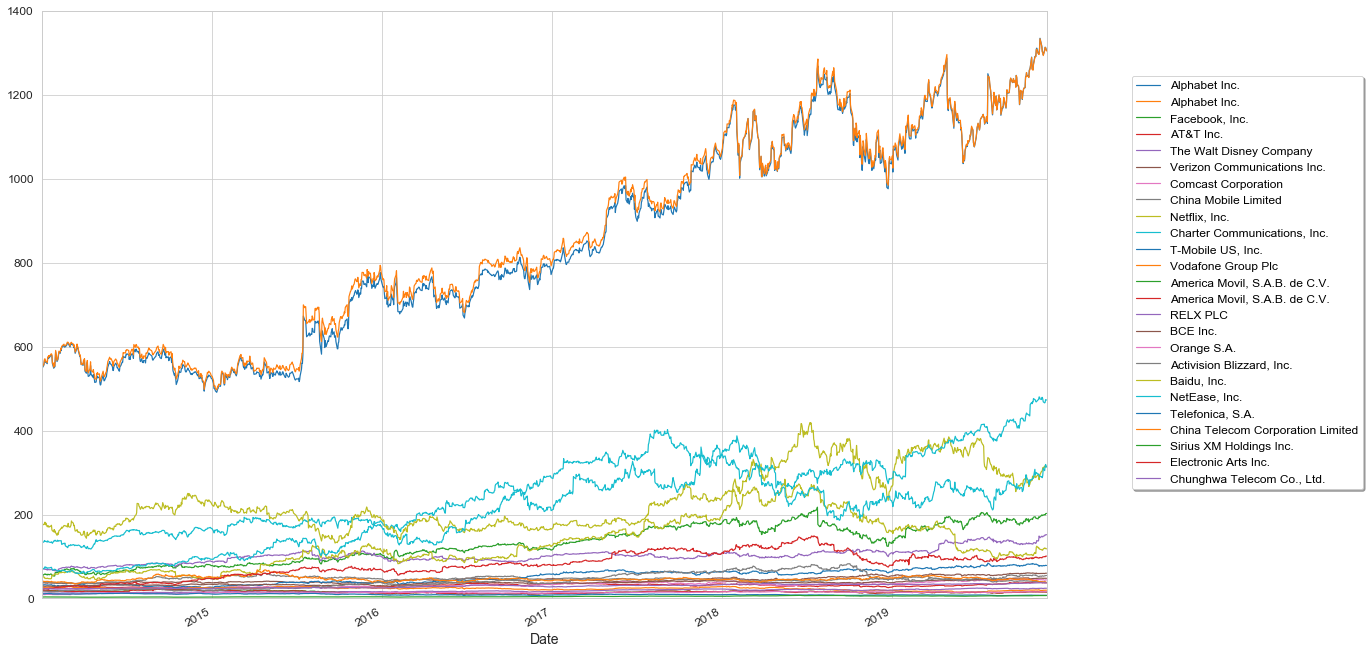

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 12))
for i in range(len(Stock_list)):
    Data[Data.Symbol == Stock_list[i]]['Adj Close'].plot(ax=ax, label=Stock_Dic[Stock_list[i]])
_ = ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.9), shadow=True, ncol=1, fontsize=12)
_, Temp = ax.get_ylim()
_ = ax.set_ylim([0, int(np.float(format(Temp, '.2e')))])

We can create some new functions that can be beneficial for applications as well.

In [15]:
def List_Search(Inp, key):
    # Inp: A list
    Out=list()
    for i in range(len(Inp)):
        if Inp[i].find(key) != -1:
            Out.append(Inp[i])
    return Out

def List_Diff(Inp_A, Inp_B):
    # Inp_A: A list
    # Inp_B: A list
    Out=list(set(Inp_A)-set(Inp_B))
    return Out

In [16]:
# Creating a new list of Columns
Columns = List_Diff(Data.columns.tolist(), List_Search(Data.columns.tolist(), 'Moving Ave'))
Columns = List_Diff(Columns, ['Symbol'])
Temp = ['Ave ' + i for i in Columns]

# A new DataFrame
Ave_df = pd.DataFrame({'Symbol':Stock_list})
for i in Temp:
    Ave_df[i]=''
del Temp
# Progress Bar    
Counter = 0
Progress_Bar = progressbar.ProgressBar(maxval=len(Stock_list),
                                       widgets=[progressbar.Bar('#', '|', '|'), progressbar.Percentage()])
Progress_Bar.start()
for i in range(len(Stock_list)):
    Counter+=1
    Progress_Bar.update(Counter)
    Ave_df.iloc[i,1:] = Data[Data.Symbol == Stock_list[i]][Columns].mean().values
               
Progress_Bar.finish()

|#########################################################################|100%


The following table shows the average values for all columns of the Data.

In [17]:
Ave_df.style.hide_index()

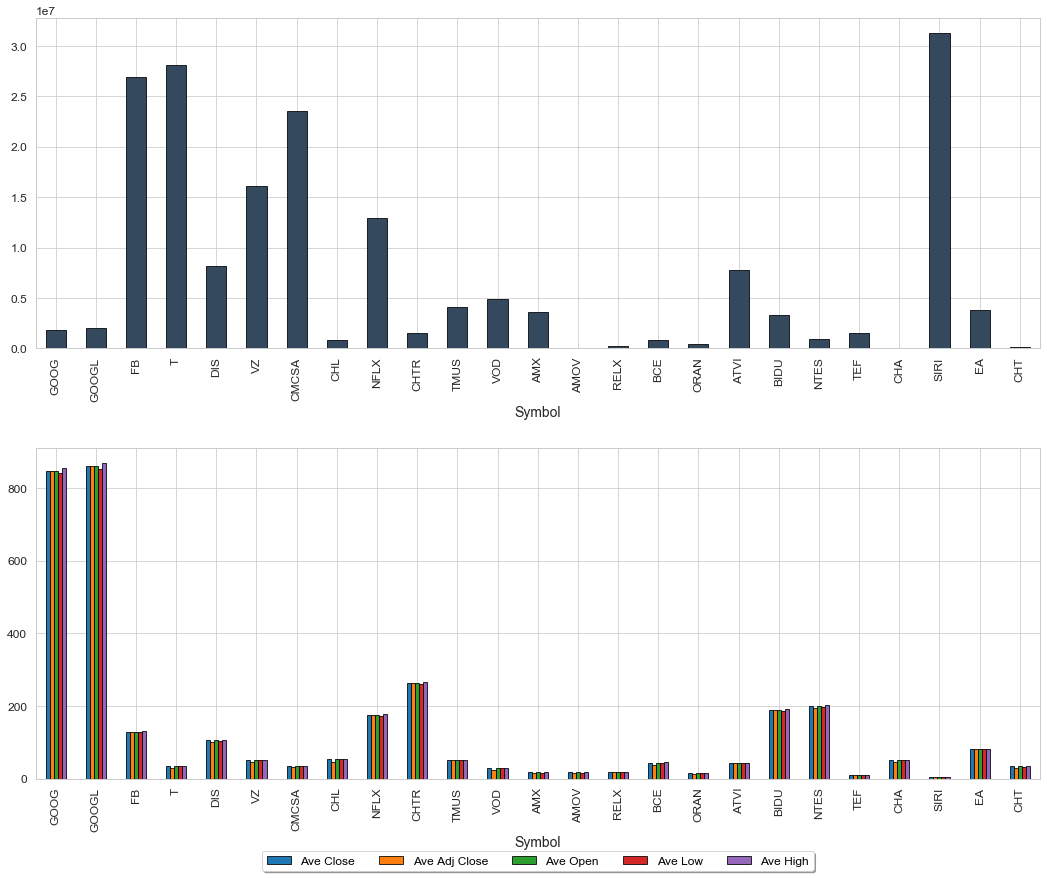

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 14), sharex=False)
# Upper Plot
Ave_df.plot.bar(x='Symbol', y='Ave Volume', rot=90,ax=ax[0], legend=False ,color='#34495e', edgecolor='k')
# Lower Plot
Temp = Ave_df.drop(columns=['Ave Volume'])
Temp.plot.bar(x='Symbol', rot=90,ax=ax[1], legend=True, edgecolor='k')
_ = ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=len(Temp.columns)-1, fontsize=12)
# Plot setting
plt.subplots_adjust(hspace=0.3,wspace=0.2)

# The Moving Average of the Stocks

Let's plot moving averages for 10, 20 and 60 day periods of time for the top **4** companies with the highest volume on average.

In [19]:
def TopN_volumes(N, df = Ave_df):
    Out = df.sort_values(by='Ave Volume', ascending=False).iloc[:N,0].tolist()
    return Out 

# Conisder the Moving Ave and Adj Close columns
Columns = List_Search(Data.columns.tolist(), 'Moving Ave')
Columns.append("Adj Close")
Columns = list(np.sort(Columns))
# A list of top N = 4 companies with the hightest volume on average.
N = 4
mylist = TopN_volumes(N)

In [20]:
# Conisder the Moving Ave and Adj Close columns
Columns = List_Search(Data.columns.tolist(), 'Moving Ave')
Columns.append("Adj Close")
Columns = list(np.sort(Columns))
# A list of top N = 4 companies with the hightest volume on average.
N = 4
mylist = Ave_df.sort_values(by='Ave Volume', ascending=False).iloc[:N,0].tolist()

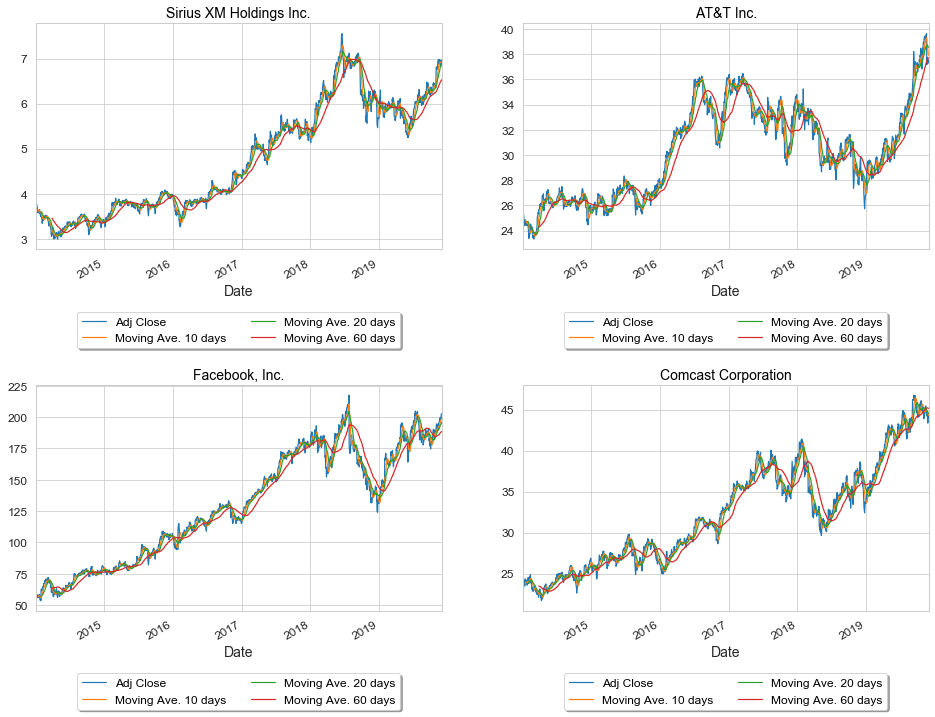

In [21]:
fig, ax = plt.subplots(nrows = math.ceil(N/2), ncols = 2, figsize=(16, 6*math.ceil(N/2)))

Counter = 0
for i in range(math.ceil(N/2)):
    for j in range(2):
        Disp_Data(mylist[Counter])[Columns].plot(ax=ax[i,j], legend = True)
        _ = ax[i,j].set_title(Stock_Dic[mylist[Counter]])
        _ = ax[i,j].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), shadow=True, ncol=2, fontsize=12)
        Counter += 1
plt.subplots_adjust(hspace=0.6, wspace=0.2)

# The Daily Return Average of a Stock

Daily return  can be calculated using the percentage change of the adjusted closing price.

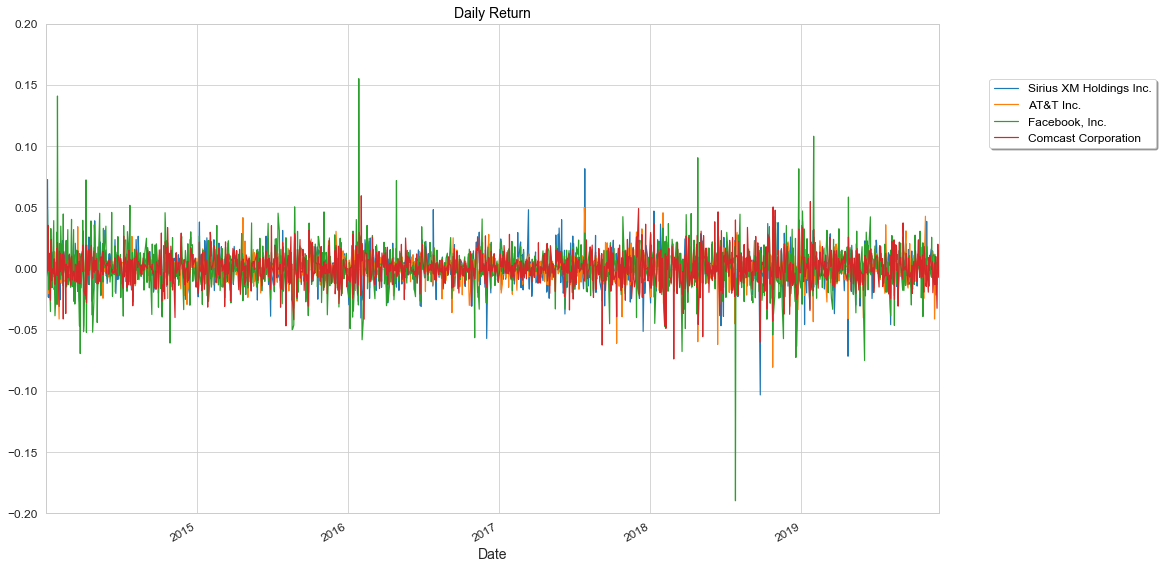

In [22]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16, 10))
for i in range(len(mylist)):
    Disp_Data(mylist[i])['Adj Close'].pct_change().plot(ax=ax, label=Stock_Dic[mylist[i]])
_ = ax.legend(loc='upper center', bbox_to_anchor=(1.15, 0.9), shadow=True, ncol=1, fontsize=12)
Temp = ax.get_ylim()
_ = ax.set_ylim([np.float(format(Temp[0], '.0e')) ,np.float(format(Temp[1], '.0e'))])
_ = ax.set_title('Daily Return', fontsize=14)

## The Correlation Between Daily Returns of Different Stocks

First, we need to create a new data frame by reading the **Adj Close** column from all stock data under study. We have,

In [23]:
All_data = pdr.DataReader(Stock_list, 'yahoo', start, end)['Adj Close']

In [24]:
All_data.head()

Symbols           GOOG       GOOGL         FB          T        DIS  \
Date                                                                  
2014-01-02  554.481689  557.117126  54.709999  25.254278  70.613052   
2014-01-03  550.436829  553.053040  54.560001  25.145884  70.464928   
2014-01-06  556.573853  559.219238  57.200001  25.261499  70.196442   
2014-01-07  567.303589  570.000000  57.919998  25.254278  70.677856   
2014-01-08  568.484192  571.186157  58.230000  25.071218  69.640938   

Symbols            VZ      CMCSA        CHL       NFLX        CHTR  ...  \
Date                                                                ...   
2014-01-02  37.378609  23.172962  39.692852  51.831429  134.759995  ...   
2014-01-03  36.936169  23.001812  39.167015  51.871429  133.369995  ...   
2014-01-06  37.142128  22.979294  39.012367  51.367142  135.000000  ...   
2014-01-07  37.607456  23.794519  39.128353  48.500000  138.080002  ...   
2014-01-08  37.399250  23.758482  38.842236  48.712856  136.089996  ...   

Symbols           BCE      ORAN       ATVI        BIDU       NTES        TEF  \
Date                                                                           
2014-01-02  29.798576  9.003366  17.238548  179.990005  71.559250  10.922293   
2014-01-03  29.812479  9.033479  17.448429  175.279999  71.467903  10.949944   
2014-01-06  29.562243  9.146398  17.248093  176.630005  71.303406  10.977594   
2014-01-07  29.374573  9.357180  17.477047  178.820007  72.820328  11.150417   
2014-01-08  29.193857  9.364707  17.496126  181.789993  75.296684  11.198808   

Symbols           CHA      SIRI         EA        CHT  
Date                                                   
2014-01-02  41.879738  3.412153  22.830000  23.432163  
2014-01-03  41.360077  3.480395  22.680000  23.325792  
2014-01-06  40.772263  3.733870  22.530001  23.181427  
2014-01-07  40.601879  3.763117  23.100000  23.158632  
2014-01-08  40.559284  3.675376  23.309999  23.006676  

[5 rows x 25 columns]

In [25]:
All_data.tail()

Symbols            GOOG        GOOGL          FB          T         DIS  \
Date                                                                      
2019-11-22  1295.339966  1293.670044  198.820007  37.750000  148.289993   
2019-11-25  1306.689941  1305.640015  199.789993  37.259998  149.690002   
2019-11-26  1313.550049  1313.000000  198.970001  37.400002  151.639999   
2019-11-27  1312.989990  1312.130005  202.000000  37.400002  151.479996   
2019-11-29  1305.729980  1304.760010  202.679993  37.550999  152.029999   

Symbols            VZ      CMCSA        CHL        NFLX        CHTR  ...  \
Date                                                                 ...   
2019-11-22  59.750000  44.799999  38.959999  310.480011  468.500000  ...   
2019-11-25  59.380001  43.349998  39.480000  315.549988  466.059998  ...   
2019-11-26  59.889999  43.549999  39.220001  312.489990  467.309998  ...   
2019-11-27  60.099998  44.419998  38.950001  315.929993  473.779999  ...   
2019-11-29  60.220001  44.105000  37.650002  314.109985  472.309998  ...   

Symbols           BCE       ORAN       ATVI        BIDU        NTES     TEF  \
Date                                                                          
2019-11-22  47.840000  16.043194  53.040001  117.989998  310.399994  7.4400   
2019-11-25  47.900002  16.199999  53.730000  120.320000  304.589996  7.4400   
2019-11-26  47.930000  16.249001  54.169998  118.599998  314.510010  7.3500   
2019-11-27  47.970001  16.309999  54.480000  119.510002  319.239990  7.4300   
2019-11-29  48.105000  16.299999  54.869999  118.169998  313.079987  7.6035   

Symbols           CHA  SIRI          EA        CHT  
Date                                                
2019-11-22  39.189999  6.81   99.190002  37.360001  
2019-11-25  39.680000  6.85   99.800003  37.389999  
2019-11-26  39.360001  6.90   99.279999  37.070000  
2019-11-27  39.080002  6.93  100.790001  37.250000  
2019-11-29  37.934101  6.97  100.915001  37.171600  

[5 rows x 25 columns]

The returns can be analyzed using the percentage change from the **adj Close**.

In [26]:
All_returns = All_data.pct_change()

In [27]:
All_returns.tail()

Symbols         GOOG     GOOGL        FB         T       DIS        VZ  \
Date                                                                     
2019-11-22 -0.004618 -0.004976  0.004497  0.003989  0.009462  0.002349   
2019-11-25  0.008762  0.009253  0.004879 -0.012980  0.009441 -0.006192   
2019-11-26  0.005250  0.005637 -0.004104  0.003757  0.013027  0.008589   
2019-11-27 -0.000426 -0.000663  0.015228  0.000000 -0.001055  0.003506   
2019-11-29 -0.005529 -0.005617  0.003366  0.004037  0.003631  0.001997   

Symbols        CMCSA       CHL      NFLX      CHTR  ...       BCE      ORAN  \
Date                                                ...                       
2019-11-22  0.009919 -0.001793 -0.003882 -0.012957  ... -0.004370  0.001223   
2019-11-25 -0.032366  0.013347  0.016329 -0.005208  ...  0.001254  0.009774   
2019-11-26  0.004614 -0.006586 -0.009697  0.002682  ...  0.000626  0.003025   
2019-11-27  0.019977 -0.006884  0.011008  0.013845  ...  0.000835  0.003754   
2019-11-29 -0.007091 -0.033376 -0.005761 -0.003103  ...  0.002814 -0.000613   

Symbols         ATVI      BIDU      NTES       TEF       CHA      SIRI  \
Date                                                                     
2019-11-22 -0.012106  0.020233  0.054384  0.005405 -0.004319 -0.021552   
2019-11-25  0.013009  0.019747 -0.018718  0.000000  0.012503  0.005874   
2019-11-26  0.008189 -0.014295  0.032568 -0.012097 -0.008065  0.007299   
2019-11-27  0.005723  0.007673  0.015039  0.010884 -0.007114  0.004348   
2019-11-29  0.007159 -0.011212 -0.019296  0.023351 -0.029322  0.005772   

Symbols           EA       CHT  
Date                            
2019-11-22  0.001818  0.001609  
2019-11-25  0.006150  0.000803  
2019-11-26 -0.005210 -0.008558  
2019-11-27  0.015210  0.004856  
2019-11-29  0.001240 -0.002105  

[5 rows x 25 columns]

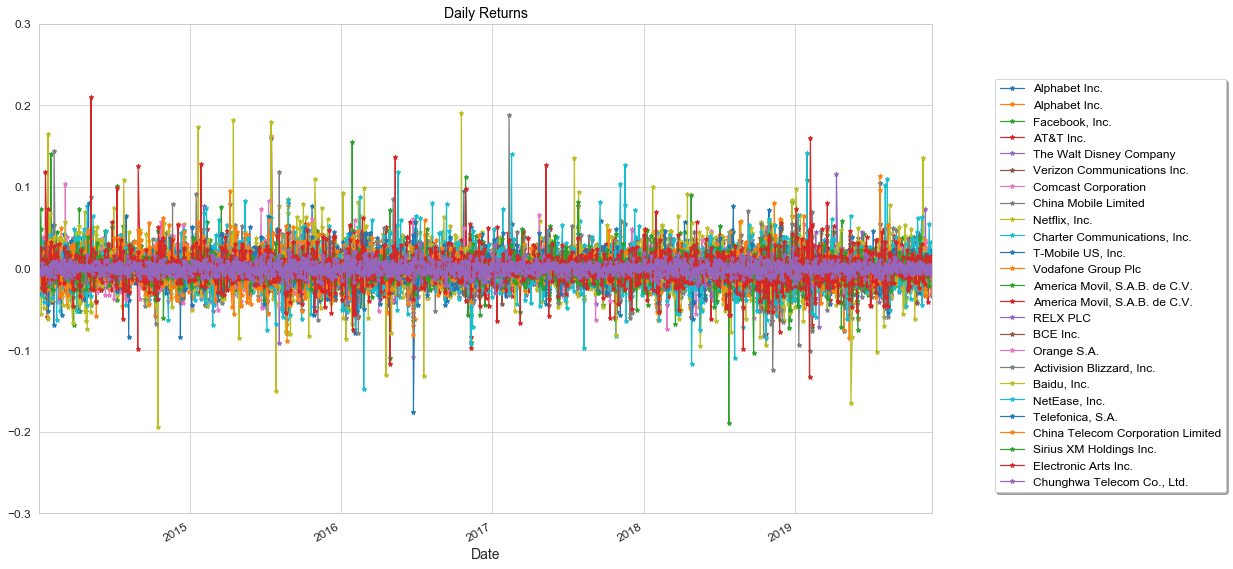

In [28]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16, 10))
All_returns.plot(marker='*', legend=True, ax=ax)
_ = ax.set_ylim([-0.3 , 0.3])
_ = ax.set_title('Daily Returns', fontsize=14)
_ = ax.legend(Stock_Dic.values(), loc='upper center', bbox_to_anchor=(1.2, 0.9), shadow=True, ncol=1, fontsize=12)

The following graphs show the correlation between different stocks.

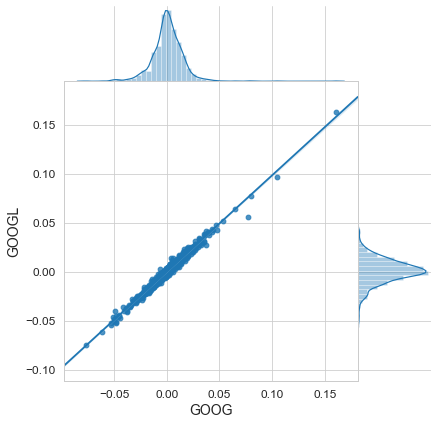

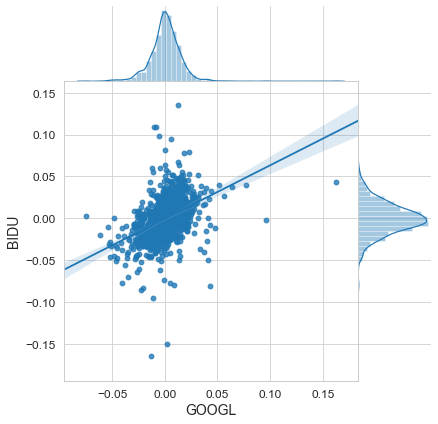

In [29]:
_ = sns.jointplot('GOOG','GOOGL', All_returns, kind='reg', space=0, size=6, ratio=4)
_ = sns.jointplot('GOOGL','BIDU', All_returns, kind='reg', space=0, size=6, ratio=4)

Now, we can use the *pairplot* tool to visualize all.

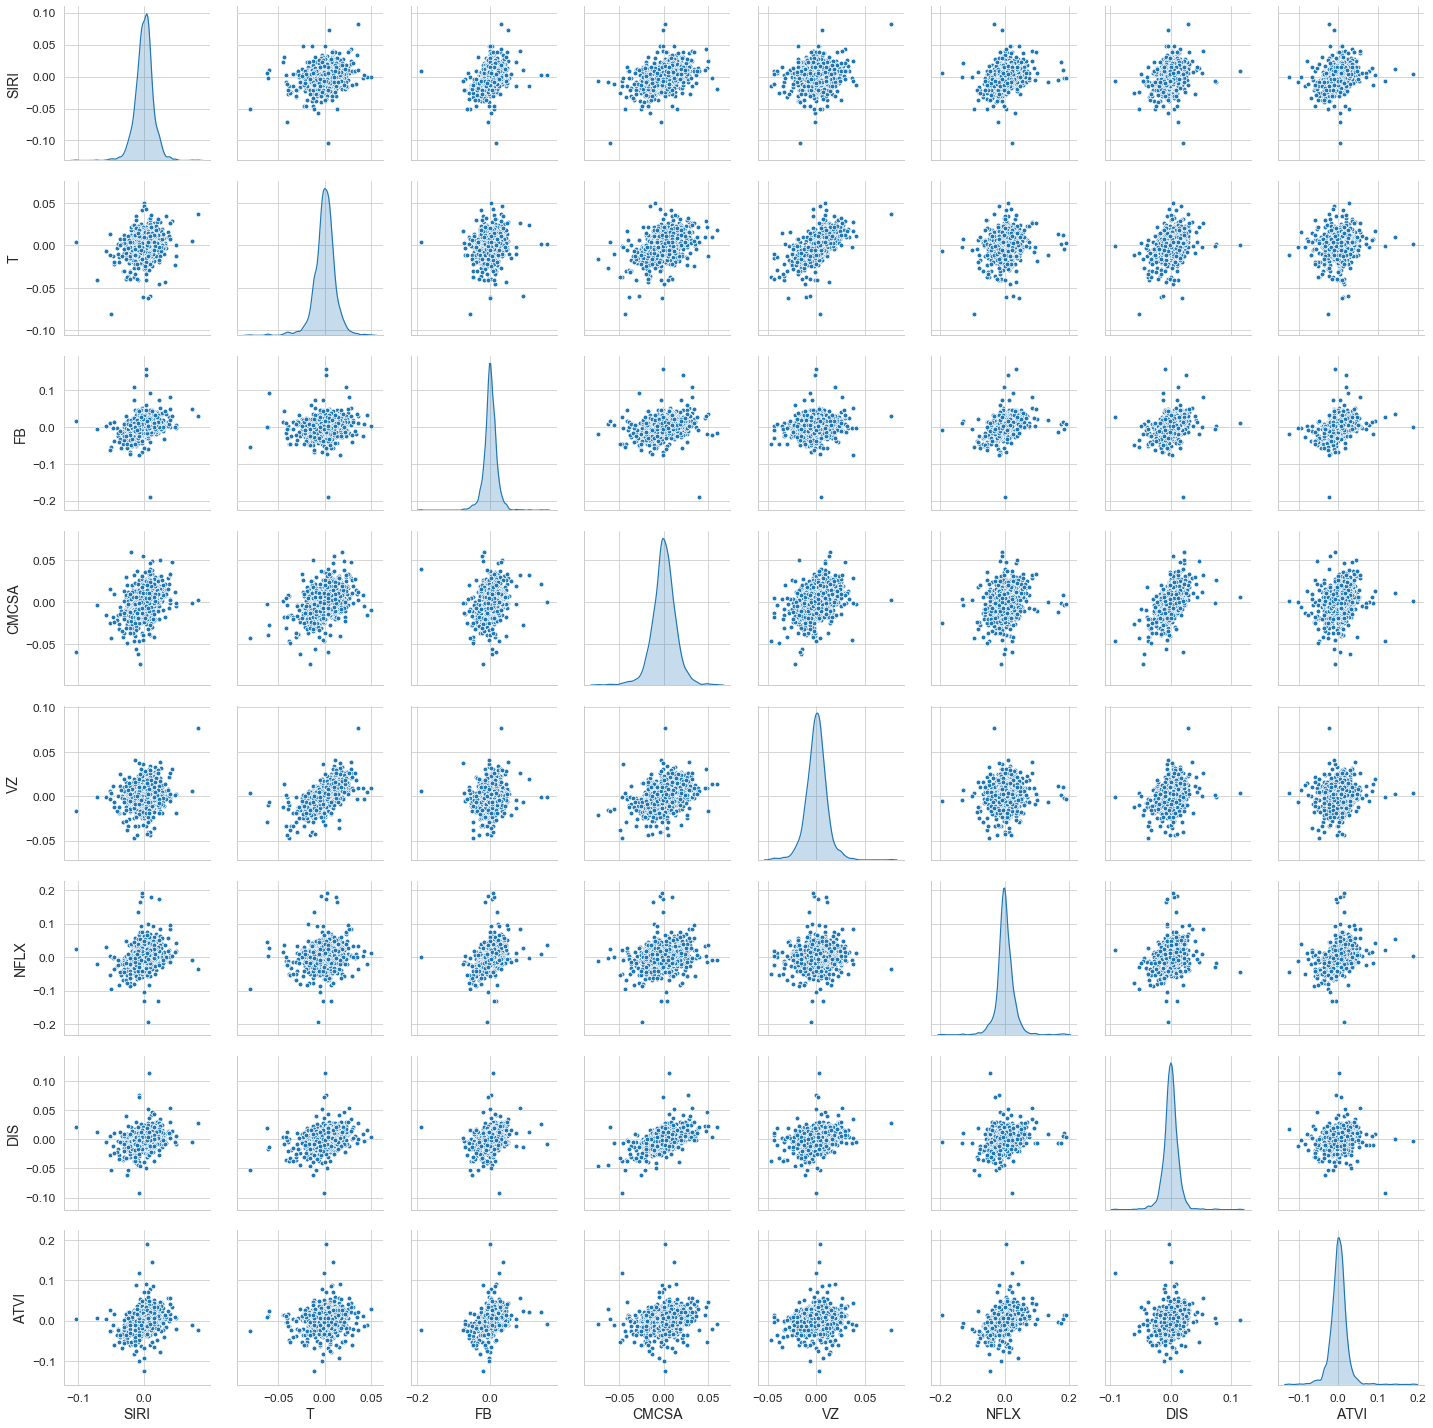

In [30]:
# Remove missing values
Temp = TopN_volumes(8, df = Ave_df)
Temp = All_returns[Temp].dropna()
# plot
_ = sns.pairplot(Temp, diag_kind='kde')

Nonetheless, the correlation matrix and plot are always convenient to see numerical values for correlations.

In [31]:
# Correlation Matrix
Cor_matrix = Temp.corr()
Cor_matrix

Symbols      SIRI         T        FB     CMCSA        VZ      NFLX       DIS  \
Symbols                                                                         
SIRI     1.000000  0.254073  0.352159  0.412250  0.196999  0.291776  0.345784   
T        0.254073  1.000000  0.152635  0.405978  0.632107  0.148469  0.331311   
FB       0.352159  0.152635  1.000000  0.274603  0.140720  0.394920  0.309637   
CMCSA    0.412250  0.405978  0.274603  1.000000  0.361043  0.224073  0.555210   
VZ       0.196999  0.632107  0.140720  0.361043  1.000000  0.096410  0.294662   
NFLX     0.291776  0.148469  0.394920  0.224073  0.096410  1.000000  0.246163   
DIS      0.345784  0.331311  0.309637  0.555210  0.294662  0.246163  1.000000   
ATVI     0.308286  0.156267  0.393961  0.253515  0.145424  0.342560  0.213872   

Symbols      ATVI  
Symbols            
SIRI     0.308286  
T        0.156267  
FB       0.393961  
CMCSA    0.253515  
VZ       0.145424  
NFLX     0.342560  
DIS      0.213872  
ATVI     1.000000

In [32]:
def Correlation_Plot (Df,Fig_Size):
    Correlation_Matrix = Df.corr()
    mask = np.zeros_like(Correlation_Matrix)
    mask[np.triu_indices_from(mask)] = True
    for i in range(len(mask)):
        mask[i,i]=0
    Fig, ax = plt.subplots(figsize=(Fig_Size,Fig_Size))
    sns.heatmap(Correlation_Matrix, ax=ax, mask=mask, annot=True, square=True, 
                cmap =sns.color_palette("RdBu", n_colors=10), linewidths = 0.2, vmin=0, vmax=1, cbar_kws={"shrink": .5})
    bottom, top = ax.get_ylim()
    _ = ax.set_ylim(bottom + 0.5, top - 0.5)

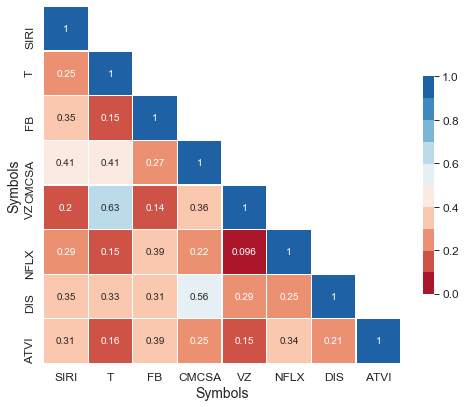

In [33]:
Correlation_Plot (Temp, 8)

Here, darker shades of blue represent a higher correlation.

In [34]:
def Risk_Plot(data):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16, 6))
    _ = ax.scatter(data.mean(), data.std(), s=25, color = "#e74c3c")
    _ = ax.set_xlabel('Expected Return')
    _ = ax.set_ylabel('Risk')
    for label,x,y in zip(data.columns, data.mean(), data.std()):
        plt.annotate(label, xy=(x,y), xytext=(-50,0), textcoords = 'offset points',
                     ha = 'right', va = 'bottom', arrowprops=dict(facecolor="#9b59b6", shrink=0.001))
    plt.autoscale(enable=True, axis='both', tight=True)
    return ax.get_xlim()

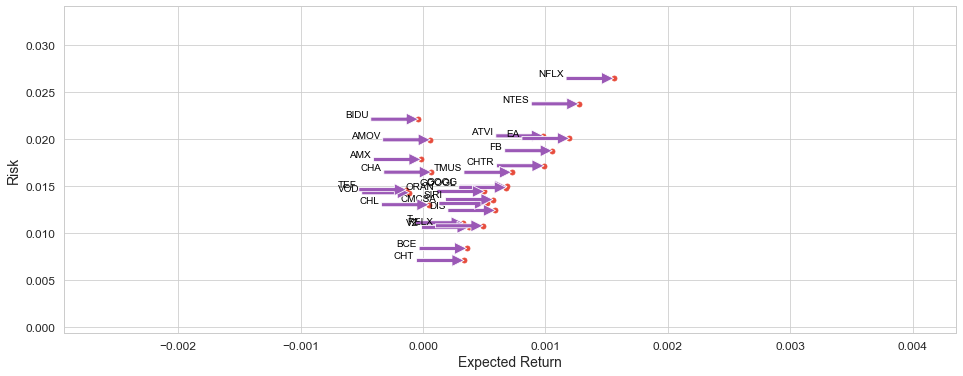

In [35]:
Temp = Risk_Plot(All_returns)

In [36]:
print("""The current trend seems to output a value between %.2e and %.2e.
We would like to identify a stock with high return and low risk!
""" % Temp)

The current trend seems to output a value between -2.94e-03 and 4.36e-03.
We would like to identify a stock with high return and low risk!



Let's find the [quantile](https://en.wikipedia.org/wiki/Quantile) for a stock.

In [37]:
qt = All_returns['NFLX'].quantile(0.05)
qt_pct = abs(All_returns['NFLX'].quantile(0.05))*100
print('Quantile Percentage: %0.4f' % qt_pct)

Quantile Percentage: 3.7248


In [38]:
print("""The 0.05 empirical quantile of daily returns is at {0:.2f}%.
      This means that with 95% confidence, the worst daily loss will not exceed {0:.2f}% (of the investment)."""
      .format(qt,qt_pct))

The 0.05 empirical quantile of daily returns is at -0.04%.
      This means that with 95% confidence, the worst daily loss will not exceed -0.04% (of the investment).


# Predicting Future Behaviors

To predict future behaviors, we can implement the [Monte Carlo method](https://en.wikipedia.org/wiki/Monte_Carlo_method) (also see this [link](https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-mathematical-foundations/variance-and-standard-deviation) and this [link](https://www.investopedia.com/terms/m/montecarlosimulation.asp)).

In [39]:
# consider a year
days = 365
# Delta t
dt = 1/365

Defining a Monte Carlo function fo the Stock price.

In [40]:
def stock_monte_carlo(start_price, days, mu, sigma):
    '''Function takes in stock price, number of days to run, mean and standard deviation values'''
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):       
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))        
        drift[x] = mu * dt
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
    return price

In [41]:
def Monte_Carlo_Analysis(Inp, mu, sigma, N=1e2, days = days):
    # get the data for Inp teach
    df = Disp_Data(Inp)
    # set the last entry of the open column as the starting price
    start_price = df['Open'][-1]
    # Ouput Figure
    N = int(N)
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16, 8))
    for run in range(100):
        _ = plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
        _ = ax.set_xlabel('Days')
        _ = ax.set_ylabel('Price')
        _ = ax.set_title('Monte Carlo Analysis for %s' % Stock_Dic[Inp])
    _ = ax.set_xlim([0,days])
    return df

In [42]:
def Final_price_distribution_simulations(Inp, mu, sigma, N= 1e4, days = days):
    # get the data for Inp teach
    df = Disp_Data(Inp)
    # set the last entry of the open column as the starting price
    start_price = df['Open'][-1]
    # Simulations array
    N = int(N)
    simulations = np.zeros(N)
    # Progress Bar    
    Counter = 0
    Progress_Bar = progressbar.ProgressBar(maxval= N, widgets=[progressbar.Bar('#', '|', '|'), progressbar.Percentage()])
    Progress_Bar.start()

    for i in range(N):
        simulations[i] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]
        Counter+=1
        Progress_Bar.update(Counter)
    Progress_Bar.finish()
    return simulations

In [43]:
def Final_price_distribution_plot(simulations, Inp):
    # get the data for Inp teach
    df = Disp_Data(Inp)
    # set the last entry of the open column as the starting price
    start_price = df['Open'][-1]
    # Output Figure
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16, 8))
    q = np.percentile(simulations, 1)
    _ = ax.hist(simulations, bins='auto', color = '#34495e')
    _ = plt.figtext(0.75, 0.80, "Start price: $%.2f" % start_price, fontsize = 12)
    _ = plt.figtext(0.75, 0.75, "Mean final price: $%.2f" % simulations.mean(), fontsize = 12)
    _ = plt.figtext(0.75, 0.70, "VaR(0.99): $%.2f" % (start_price -q,), fontsize = 12)
    _ = plt.figtext(0.15,0.665, "q(0.99): $%.2f" % q, fontsize = 12)
    _ = ax.set_xlim()
    _ = ax.axvline(x=q, linewidth=4, color='#e74c3c')
    _ = ax.set_title("Final price distribution for %s after %s days" % (Stock_Dic[Inp], days), weight='bold')

### Facebook, Inc.

High         Low        Open       Close      Volume  \
Date                                                                     
2014-01-02   55.220001   54.189999   54.830002   54.709999  43195500.0   
2014-01-03   55.650002   54.529999   55.020000   54.560001  38246200.0   
2014-01-06   57.259998   54.049999   54.419998   57.200001  68852600.0   
2014-01-07   58.549999   57.220001   57.700001   57.919998  77207400.0   
2014-01-08   58.410000   57.230000   57.599998   58.230000  56682400.0   
...                ...         ...         ...         ...         ...   
2019-11-22  199.300003  197.619995  198.380005  198.820007   9959800.0   
2019-11-25  200.970001  199.250000  199.520004  199.789993  15272300.0   
2019-11-26  200.149994  198.039993  200.000000  198.970001  11735500.0   
2019-11-27  203.139999  199.419998  199.899994  202.000000  12736600.0   
2019-11-29  203.800003  201.210007  201.600006  202.740005   5347269.0   

             Adj Close  Moving Ave. 10 days  Moving Ave. 20 days  \
Date                                                               
2014-01-02   54.709999                  NaN                  NaN   
2014-01-03   54.560001                  NaN                  NaN   
2014-01-06   57.200001                  NaN                  NaN   
2014-01-07   57.919998                  NaN                  NaN   
2014-01-08   58.230000                  NaN                  NaN   
...                ...                  ...                  ...   
2019-11-22  198.820007           195.650000           193.528999   
2019-11-25  199.789993           196.667999           194.048499   
2019-11-26  198.970001           197.117999           194.531499   
2019-11-27  202.000000           197.998999           195.218999   
2019-11-29  202.740005           198.958000           195.773500   

            Moving Ave. 60 days  
Date                             
2014-01-02                  NaN  
2014-01-03                  NaN  
2014-01-06                  NaN  
2014-01-07                  NaN  
2014-01-08                  NaN  
...                         ...  
2019-11-22           187.552833  
2019-11-25           187.788167  
2019-11-26           188.064500  
2019-11-27           188.312167  
2019-11-29           188.509500  

[1489 rows x 9 columns]

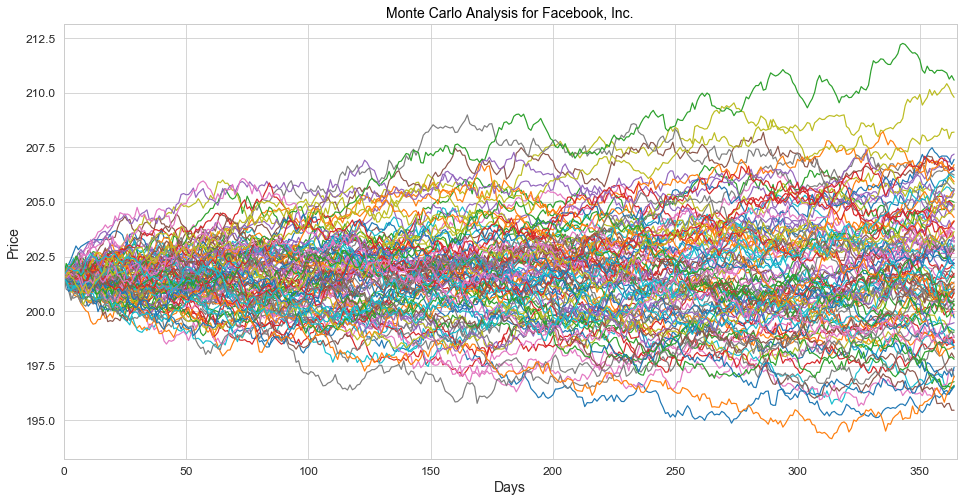

In [44]:
Stock = 'FB'
# mean
mu = All_returns.mean()[Stock]
# standard deviation
sigma = All_returns.std()[Stock]
# Analysis
Monte_Carlo_Analysis(Stock, mu = mu, sigma = sigma)

The frequencies of different outcomes simulated form a [**Bell curve**](https://www.investopedia.com/terms/b/bell-curve.asp). The most likely return is in the middle of the curve. This means there is an equal chance that the actual return will be higher or lower than that value.

In [45]:
Simulations = Final_price_distribution_simulations(Stock,  mu = mu, sigma = sigma)

|#########################################################################|100%


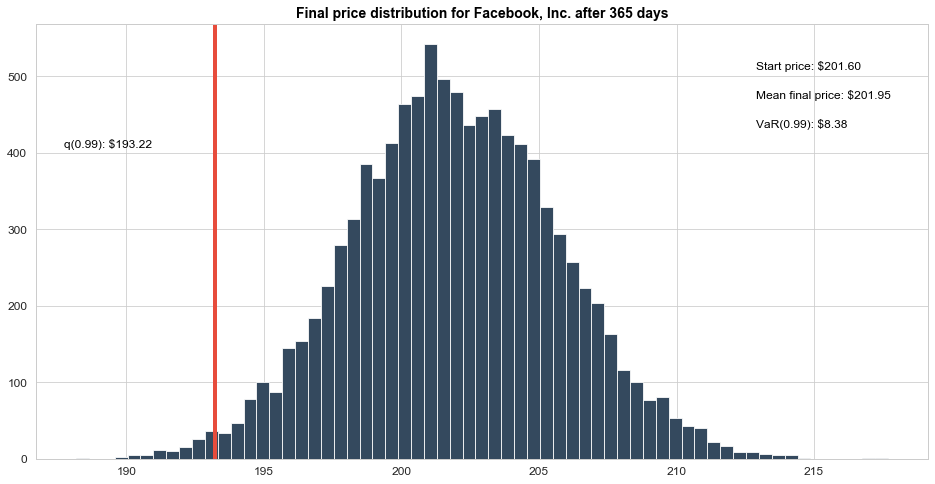

In [46]:
Final_price_distribution_plot(Simulations, Stock)

See more details about **Value at Risk (VaR)** [here](https://www.investopedia.com/articles/04/092904.asp).

***